# DQN

In this notebook, we'll build a neural network that can learn to play games through reinforcement learning. More specifically, we'll use Q-learning to train an agent to play a game called [Cart-Pole](https://gym.openai.com/envs/CartPole-v0). In this game, a freely swinging pole is attached to a cart. The cart can move to the left and right, and the goal is to keep the pole upright as long as possible.

![Cart-Pole](assets/cart-pole.jpg)

We can simulate this game using [OpenAI Gym](https://gym.openai.com/). First, let's check out how OpenAI Gym works. Then, we'll get into training an agent to play the Cart-Pole game.

In [3]:
# In this one we should define and detect GPUs for tensorflow
# GPUs or CPU
import tensorflow as tf

# Check TensorFlow Version
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.7.1
Default GPU Device: 


>**Note:** Make sure you have OpenAI Gym cloned into the same directory with this notebook. I've included `gym` as a submodule, so you can run `git submodule --init --recursive` to pull the contents into the `gym` repo.

>**Note:** Make sure you have OpenAI Gym cloned. Then run this command `pip install -e gym/[all]`.

In [4]:
import gym

## Create the Cart-Pole game environment
env = gym.make('CartPole-v0')
env = gym.make('CartPole-v1')

We interact with the simulation through `env`. To show the simulation running, you can use `env.render()` to render one frame. Passing in an action as an integer to `env.step` will generate the next step in the simulation.  You can see how many actions are possible from `env.action_space` and to get a random action you can use `env.action_space.sample()`. This is general to all Gym games. In the Cart-Pole game, there are two possible actions, moving the cart left or right. So there are two actions we can take, encoded as 0 and 1.

Run the code below to watch the simulation run.

In [5]:
import numpy as np

state = env.reset()
batch = []
for _ in range(1000):
    # env.render()
    action = env.action_space.sample()
    next_state, reward, done, info = env.step(action) # take a random action
    batch.append([state, action, next_state, reward, float(done)])
    print('state, action, reward, done, info:', 
          state, action, reward, done, info)
    state = next_state
    if done:
        state = env.reset()

state, action, reward, done, info: [-0.00197591 -0.02817591 -0.03492529  0.04227624] 0 1.0 False {}
state, action, reward, done, info: [-0.00253943 -0.22278009 -0.03407976  0.32373854] 1 1.0 False {}
state, action, reward, done, info: [-0.00699503 -0.02718986 -0.02760499  0.02050605] 1 1.0 False {}
state, action, reward, done, info: [-0.00753883  0.16831687 -0.02719487 -0.28075716] 0 1.0 False {}
state, action, reward, done, info: [-0.00417249 -0.02640681 -0.03281001  0.00322606] 1 1.0 False {}
state, action, reward, done, info: [-0.00470063  0.16916994 -0.03274549 -0.2996256 ] 1 1.0 False {}
state, action, reward, done, info: [-0.00131723  0.36474297 -0.03873801 -0.60245333] 1 1.0 False {}
state, action, reward, done, info: [ 0.00597763  0.56038474 -0.05078707 -0.90708195] 1 1.0 False {}
state, action, reward, done, info: [ 0.01718532  0.75615614 -0.06892871 -1.21528538] 1 1.0 False {}
state, action, reward, done, info: [ 0.03230845  0.95209625 -0.09323442 -1.52874662] 1 1.0 False {}


state, action, reward, done, info: [-0.07106347 -0.60144451  0.06204691  0.90458348] 0 1.0 False {}
state, action, reward, done, info: [-0.08309236 -0.79734941  0.08013858  1.21610545] 0 1.0 False {}
state, action, reward, done, info: [-0.09903935 -0.99340832  0.10446069  1.5327855 ] 1 1.0 False {}
state, action, reward, done, info: [-0.11890752 -0.79968872  0.1351164   1.27444569] 0 1.0 False {}
state, action, reward, done, info: [-0.13490129 -0.9962505   0.16060532  1.60620453] 1 1.0 False {}
state, action, reward, done, info: [-0.1548263  -0.80335091  0.19272941  1.36759412] 0 1.0 True {}
state, action, reward, done, info: [-0.02309577 -0.02878643 -0.00699472  0.02858932] 0 1.0 False {}
state, action, reward, done, info: [-0.0236715  -0.22380738 -0.00642293  0.31905716] 1 1.0 False {}
state, action, reward, done, info: [-2.81476497e-02 -2.85945464e-02 -4.17867508e-05  2.43556171e-02] 1 1.0 False {}
state, action, reward, done, info: [-0.02871954  0.166528    0.00044533 -0.26834049] 

state, action, reward, done, info: [-0.17833138 -0.81313549  0.10795806  1.06902708] 1 1.0 False {}
state, action, reward, done, info: [-0.19459409 -0.61959409  0.1293386   0.81208318] 1 1.0 False {}
state, action, reward, done, info: [-0.20698597 -0.42645853  0.14558026  0.56271923] 0 1.0 False {}
state, action, reward, done, info: [-0.21551514 -0.62329104  0.15683464  0.89749439] 1 1.0 False {}
state, action, reward, done, info: [-0.22798096 -0.43060284  0.17478453  0.65793009] 0 1.0 False {}
state, action, reward, done, info: [-0.23659302 -0.62767123  0.18794313  1.00015429] 0 1.0 False {}
state, action, reward, done, info: [-0.24914644 -0.82473983  0.20794622  1.34548236] 1 1.0 True {}
state, action, reward, done, info: [ 0.01707714 -0.00404956  0.02147397  0.04027971] 1 1.0 False {}
state, action, reward, done, info: [ 0.01699615  0.19075798  0.02227956 -0.24555137] 1 1.0 False {}
state, action, reward, done, info: [ 0.02081131  0.38555476  0.01736853 -0.53112436] 0 1.0 False {}
s

state, action, reward, done, info: [ 0.00785865 -0.40653727  0.09805753  0.78460573] 1 1.0 False {}
state, action, reward, done, info: [-2.72098934e-04 -2.12889619e-01  1.13749640e-01  5.24312348e-01] 0 1.0 False {}
state, action, reward, done, info: [-0.00452989 -0.40941317  0.12423589  0.85056294] 0 1.0 False {}
state, action, reward, done, info: [-0.01271815 -0.60599024  0.14124715  1.17958738] 0 1.0 False {}
state, action, reward, done, info: [-0.02483796 -0.80263478  0.16483889  1.51300539] 0 1.0 False {}
state, action, reward, done, info: [-0.04089066 -0.99932417  0.195099    1.85228369] 1 1.0 True {}
state, action, reward, done, info: [ 0.01278138 -0.00812112 -0.03010185  0.00635363] 1 1.0 False {}
state, action, reward, done, info: [ 0.01261896  0.18741932 -0.02997478 -0.29567275] 0 1.0 False {}
state, action, reward, done, info: [ 0.01636735 -0.00726277 -0.03588823 -0.01259207] 1 1.0 False {}
state, action, reward, done, info: [ 0.01622209  0.18835499 -0.03614007 -0.31637865] 

state, action, reward, done, info: [-0.03722956  0.15789466 -0.05055722 -0.28662836] 1 1.0 False {}
state, action, reward, done, info: [-0.03407167  0.3536998  -0.05628979 -0.59481827] 1 1.0 False {}
state, action, reward, done, info: [-0.02699767  0.54956254 -0.06818615 -0.90468752] 1 1.0 False {}
state, action, reward, done, info: [-0.01600642  0.74553838 -0.0862799  -1.21799938] 0 1.0 False {}
state, action, reward, done, info: [-0.00109565  0.55162832 -0.11063989 -0.95355107] 1 1.0 False {}
state, action, reward, done, info: [ 0.00993692  0.74805092 -0.12971091 -1.27884529] 1 1.0 False {}
state, action, reward, done, info: [ 0.02489793  0.94456537 -0.15528782 -1.60916884] 1 1.0 False {}
state, action, reward, done, info: [ 0.04378924  1.14114395 -0.18747119 -1.94595993] 1 1.0 True {}
state, action, reward, done, info: [-0.01597053  0.01231453 -0.02754136  0.03837532] 1 1.0 False {}
state, action, reward, done, info: [-0.01572424  0.20782037 -0.02677385 -0.26286837] 0 1.0 False {}
s

state, action, reward, done, info: [-0.04988032 -0.34874218  0.01318082  0.1379823 ] 0 1.0 False {}
state, action, reward, done, info: [-0.05685517 -0.54405041  0.01594046  0.43479426] 1 1.0 False {}
state, action, reward, done, info: [-0.06773617 -0.34915771  0.02463635  0.14717865] 1 1.0 False {}
state, action, reward, done, info: [-0.07471933 -0.15439707  0.02757992 -0.13763131] 1 1.0 False {}
state, action, reward, done, info: [-0.07780727  0.04031922  0.0248273  -0.4214872 ] 1 1.0 False {}
state, action, reward, done, info: [-0.07700089  0.23508078  0.01639755 -0.70624103] 1 1.0 False {}
state, action, reward, done, info: [-0.07229927  0.42997175  0.00227273 -0.99371753] 1 1.0 False {}
state, action, reward, done, info: [-0.06369983  0.62506323 -0.01760162 -1.2856858 ] 1 1.0 False {}
state, action, reward, done, info: [-0.05119857  0.82040475 -0.04331534 -1.5838273 ] 1 1.0 False {}
state, action, reward, done, info: [-0.03479048  1.01601432 -0.07499188 -1.88969717] 0 1.0 False {}


To shut the window showing the simulation, use `env.close()`.

If you ran the simulation above, we can look at the rewards:

In [6]:
batch[0], batch[0][0].shape

([array([-0.00197591, -0.02817591, -0.03492529,  0.04227624]),
  0,
  array([-0.00253943, -0.22278009, -0.03407976,  0.32373854]),
  1.0,
  0.0],
 (4,))

In [7]:
states = np.array([each[0] for each in batch])
actions = np.array([each[1] for each in batch])
next_states = np.array([each[2] for each in batch])
rewards = np.array([each[3] for each in batch])
dones = np.array([each[4] for each in batch])

In [8]:
print(rewards[-20:])
print(np.array(rewards).shape, np.array(states).shape, np.array(actions).shape, np.array(dones).shape)
print(np.array(rewards).dtype, np.array(states).dtype, np.array(actions).dtype, np.array(dones).dtype)
print(np.max(np.array(actions)), np.min(np.array(actions)))
print((np.max(np.array(actions)) - np.min(np.array(actions)))+1)
print(np.max(np.array(rewards)), np.min(np.array(rewards)))
print(np.max(np.array(states)), np.min(np.array(states)))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
(1000,) (1000, 4) (1000,) (1000,)
float64 float64 int64 float64
1 0
2
1.0 1.0
2.343876744367186 -2.4007109252165777


The game resets after the pole has fallen past a certain angle. For each frame while the simulation is running, it returns a reward of 1.0. The longer the game runs, the more reward we get. Then, our network's goal is to maximize the reward by keeping the pole vertical. It will do this by moving the cart to the left and the right.

## Q-Network

We train our Q-learning agent using the Bellman Equation:

$$
Q(s, a) = r + \gamma \max{Q(s', a')}
$$

where $s$ is a state, $a$ is an action, and $s'$ is the next state from state $s$ and action $a$.

Before we used this equation to learn values for a Q-_table_. However, for this game there are a huge number of states available. The state has four values: the position and velocity of the cart, and the position and velocity of the pole. These are all real-valued numbers, so ignoring floating point precisions, you practically have infinite states. Instead of using a table then, we'll replace it with a neural network that will approximate the Q-table lookup function.

<img src="assets/deep-q-learning.png" width=450px>

Now, our Q value, $Q(s, a)$ is calculated by passing in a state to the network. The output will be Q-values for each available action, with fully connected hidden layers.

<img src="assets/q-network.png" width=550px>


As I showed before, we can define our targets for training as $\hat{Q}(s,a) = r + \gamma \max{Q(s', a')}$. Then we update the weights by minimizing $(\hat{Q}(s,a) - Q(s,a))^2$. 

For this Cart-Pole game, we have four inputs, one for each value in the state, and two outputs, one for each action. To get $\hat{Q}$, we'll first choose an action, then simulate the game using that action. This will get us the next state, $s'$, and the reward. With that, we can calculate $\hat{Q}$ then pass it back into the $Q$ network to run the optimizer and update the weights.

Below is my implementation of the Q-network. I used two fully connected layers with ReLU activations. Two seems to be good enough, three might be better. Feel free to try it out.

In [9]:
def model_input(state_size):
    states = tf.placeholder(tf.float32, [None, state_size], name='states')
    actions = tf.placeholder(tf.int32, [None], name='actions')
    targetQs = tf.placeholder(tf.float32, [None], name='targetQs')
    return states, actions, targetQs

In [11]:
# Generator: Generating/prediting the actions
def generator(states, action_size, hidden_size, reuse=False, alpha=0.1, training=False):
    with tf.variable_scope('generator', reuse=reuse):
        # First fully connected layer
        h1 = tf.layers.dense(inputs=states, units=hidden_size)
        bn1 = tf.layers.batch_normalization(h1, training=training)        
        nl1 = tf.maximum(alpha * bn1, bn1)
        
        # Second fully connected layer
        h2 = tf.layers.dense(inputs=nl1, units=hidden_size)
        bn2 = tf.layers.batch_normalization(h2, training=training)        
        nl2 = tf.maximum(alpha * bn2, bn2)
        
        # Output layer
        logits = tf.layers.dense(inputs=nl2, units=action_size)        
        #predictions = tf.nn.softmax(logits)

        # return actions logits
        return logits

In [12]:
def model_loss(states, actions, targetQs, action_size, hidden_size):
    actions_logits = generator(states=states, hidden_size=hidden_size, action_size=action_size)
    actions_labels = tf.one_hot(indices=actions, depth=action_size, dtype=actions_logits.dtype)
    Qs = tf.reduce_max(actions_logits*actions_labels, axis=1)
    #Qs = tf.reduce_max(actions_logits, axis=1)
    loss = tf.reduce_mean(tf.square(Qs - targetQs))
    return actions_logits, loss

In [13]:
def model_opt(loss, learning_rate):
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)): # Required for batchnorm (BN)
        opt = tf.train.AdamOptimizer(learning_rate).minimize(loss, var_list=g_vars)

    return opt

In [14]:
class Model:
    def __init__(self, state_size, action_size, hidden_size, learning_rate):

        # Data of the Model: make the data available inside the framework
        self.states, self.actions, self.targetQs = model_input(state_size=state_size)

        # Create the Model: calculating the loss and forwad pass
        self.actions_logits, self.loss = model_loss(
            action_size=action_size, hidden_size=hidden_size, # model init parameters
            states=self.states, actions=self.actions, targetQs=self.targetQs) # model input

        # Update the model: backward pass and backprop
        self.opt = model_opt(loss=self.loss, learning_rate=learning_rate)

## Experience replay

Reinforcement learning algorithms can have stability issues due to correlations between states. To reduce correlations when training, we can store the agent's experiences and later draw a random mini-batch of those experiences to train on. 

Here, we'll create a `Memory` object that will store our experiences, our transitions $<s, a, r, s'>$. This memory will have a maxmium capacity, so we can keep newer experiences in memory while getting rid of older experiences. Then, we'll sample a random mini-batch of transitions $<s, a, r, s'>$ and train on those.

Below, I've implemented a `Memory` object. If you're unfamiliar with `deque`, this is a double-ended queue. You can think of it like a tube open on both sides. You can put objects in either side of the tube. But if it's full, adding anything more will push an object out the other side. This is a great data structure to use for the memory buffer.

In [15]:
from collections import deque
class Memory():
    def __init__(self, max_size = 1000):
        self.buffer = deque(maxlen=max_size)
    def sample(self, batch_size):
        idx = np.random.choice(np.arange(len(self.buffer)), 
                               size=batch_size, 
                               replace=False)
        return [self.buffer[ii] for ii in idx]

## Exploration - Exploitation

To learn about the environment and rules of the game, the agent needs to explore by taking random actions. We'll do this by choosing a random action with some probability $\epsilon$ (epsilon).  That is, with some probability $\epsilon$ the agent will make a random action and with probability $1 - \epsilon$, the agent will choose an action from $Q(s,a)$. This is called an **$\epsilon$-greedy policy**.


At first, the agent needs to do a lot of exploring. Later when it has learned more, the agent can favor choosing actions based on what it has learned. This is called _exploitation_. We'll set it up so the agent is more likely to explore early in training, then more likely to exploit later in training.

## Q-Learning training algorithm

Putting all this together, we can list out the algorithm we'll use to train the network. We'll train the network in _episodes_. One *episode* is one simulation of the game. For this game, the goal is to keep the pole upright for 195 frames. So we can start a new episode once meeting that goal. The game ends if the pole tilts over too far, or if the cart moves too far the left or right. When a game ends, we'll start a new episode. Now, to train the agent:

* Initialize the memory $D$
* Initialize the action-value network $Q$ with random weights
* **For** episode = 1, $M$ **do**
  * **For** $t$, $T$ **do**
     * With probability $\epsilon$ select a random action $a_t$, otherwise select $a_t = \mathrm{argmax}_a Q(s,a)$
     * Execute action $a_t$ in simulator and observe reward $r_{t+1}$ and new state $s_{t+1}$
     * Store transition $<s_t, a_t, r_{t+1}, s_{t+1}>$ in memory $D$
     * Sample random mini-batch from $D$: $<s_j, a_j, r_j, s'_j>$
     * Set $\hat{Q}_j = r_j$ if the episode ends at $j+1$, otherwise set $\hat{Q}_j = r_j + \gamma \max_{a'}{Q(s'_j, a')}$
     * Make a gradient descent step with loss $(\hat{Q}_j - Q(s_j, a_j))^2$
  * **endfor**
* **endfor**

## Hyperparameters

One of the more difficult aspects of reinforcememt learning are the large number of hyperparameters. Not only are we tuning the network, but we're tuning the simulation.

In [16]:
print('state size:{}'.format(states.shape), 
      'actions:{}'.format(actions.shape)) 
print('action size:', np.max(actions) - np.min(actions)+1)

state size:(1000, 4) actions:(1000,)
action size: 2


In [18]:
# Exploration parameters
explore_start = 1.0            # exploration probability at start
explore_stop = 0.01            # minimum exploration probability 
decay_rate = 0.0001            # exponential decay rate for exploration prob

# Network parameters
action_size = 2
state_size = 4
hidden_size = 64               # number of units in each Q-network hidden layer
learning_rate = 0.0001         # Q-network learning rate

# Memory parameters
memory_size = 10000            # memory capacity
batch_size = 100               # experience mini-batch size
gamma = 0.99                   # future reward discount

In [19]:
# Reset/init the graph/session
graph = tf.reset_default_graph()

# Init the model
model = Model(action_size=action_size, hidden_size=hidden_size, state_size=state_size, learning_rate=learning_rate)

# Init the memory
memory = Memory(max_size=memory_size)

## Populate the memory (exprience memory)

Here I'm re-initializing the simulation and pre-populating the memory. The agent is taking random actions and storing the transitions in memory. This will help the agent with exploring the game.

In [20]:
state = env.reset()
for _ in range(memory_size):
    action = env.action_space.sample()
    next_state, reward, done, _ = env.step(action)
    memory.buffer.append([state, action, next_state, reward, float(done)])
    state = next_state
    if done is True:
        state = env.reset()

## Training the model

Below we'll train our agent. If you want to watch it train, uncomment the `env.render()` line. This is slow because it's rendering the frames slower than the network can train. But, it's cool to watch the agent get better at the game.

In [21]:
# Save/load the model and save for plotting
saver = tf.train.Saver()
episode_rewards_list, rewards_list, loss_list = [], [], []

# TF session for training
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    #saver.restore(sess, 'checkpoints/model.ckpt')    
    #saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    total_step = 0 # Explore or exploit parameter
    episode_reward = deque(maxlen=100) # 100 episodes average/running average/running mean/window
    
    # Training episodes/epochs
    for ep in range(11111):
        total_reward = 0
        loss_batch = []
        state = env.reset()

        # Training steps/batches
        while True:
            # Explore (Env) or Exploit (Model): NO
            total_step += 1
            explore_p = explore_stop + (explore_start - explore_stop) * np.exp(-decay_rate * total_step) 
            # if explore_p > np.random.rand():
            #     action = env.action_space.sample()
            # else:
            action_logits = sess.run(model.actions_logits, feed_dict={model.states: state.reshape([1, -1])})
            action = np.argmax(action_logits)
            next_state, reward, done, _ = env.step(action)
            memory.buffer.append([state, action, next_state, reward, float(done)])
            total_reward += reward
            state = next_state

            # Training
            batch = memory.sample(batch_size)
            states = np.array([each[0] for each in batch])
            actions = np.array([each[1] for each in batch])
            next_states = np.array([each[2] for each in batch])
            rewards = np.array([each[3] for each in batch])
            dones = np.array([each[4] for each in batch])
            next_actions_logits = sess.run(model.actions_logits, feed_dict = {model.states: next_states})
            nextQs = np.max(next_actions_logits, axis=1) * (1-dones)
            targetQs = rewards + (gamma * nextQs)
            loss, _ = sess.run([model.loss, model.opt], feed_dict = {model.states: states, 
                                                                     model.actions: actions,
                                                                     model.targetQs: targetQs})
            loss_batch.append(loss)
            if done is True:
                break
                
        episode_reward.append(total_reward)
        print('Episode:{}'.format(ep),
              'meanR:{:.4f}'.format(np.mean(episode_reward)),
              'R:{}'.format(total_reward),
              'loss:{:.4f}'.format(np.mean(loss_batch)),
              'exploreP:{:.4f}'.format(explore_p))
        # Ploting out
        episode_rewards_list.append([ep, np.mean(episode_reward)])
        rewards_list.append([ep, total_reward])
        loss_list.append([ep, np.mean(loss_batch)])
        # Break episode/epoch loop
        if np.mean(episode_reward) >= 500:
            break
            
    # At the end of all training episodes/epochs
    saver.save(sess, 'checkpoints/model.ckpt')

Episode:0 meanR:10.0000 R:10.0 loss:1.0672 exploreP:0.9990
Episode:1 meanR:13.5000 R:17.0 loss:1.0634 exploreP:0.9973
Episode:2 meanR:14.6667 R:17.0 loss:1.0613 exploreP:0.9957
Episode:3 meanR:13.5000 R:10.0 loss:1.0727 exploreP:0.9947
Episode:4 meanR:12.8000 R:10.0 loss:1.0775 exploreP:0.9937
Episode:5 meanR:12.3333 R:10.0 loss:1.0699 exploreP:0.9927
Episode:6 meanR:11.7143 R:8.0 loss:1.0711 exploreP:0.9919
Episode:7 meanR:12.1250 R:15.0 loss:1.0791 exploreP:0.9904
Episode:8 meanR:11.7778 R:9.0 loss:1.0903 exploreP:0.9896
Episode:9 meanR:11.4000 R:8.0 loss:1.0976 exploreP:0.9888
Episode:10 meanR:11.1818 R:9.0 loss:1.0685 exploreP:0.9879
Episode:11 meanR:11.0000 R:9.0 loss:1.0937 exploreP:0.9870
Episode:12 meanR:10.9231 R:10.0 loss:1.1041 exploreP:0.9860
Episode:13 meanR:10.7857 R:9.0 loss:1.1254 exploreP:0.9852
Episode:14 meanR:10.7333 R:10.0 loss:1.1156 exploreP:0.9842
Episode:15 meanR:10.6250 R:9.0 loss:1.1326 exploreP:0.9833
Episode:16 meanR:10.5882 R:10.0 loss:1.1440 exploreP:0.98

Episode:140 meanR:11.1300 R:97.0 loss:18.3592 exploreP:0.8607
Episode:141 meanR:11.7700 R:73.0 loss:18.8028 exploreP:0.8545
Episode:142 meanR:11.8600 R:19.0 loss:15.5107 exploreP:0.8529
Episode:143 meanR:12.3600 R:60.0 loss:16.5252 exploreP:0.8478
Episode:144 meanR:13.2800 R:100.0 loss:17.1841 exploreP:0.8395
Episode:145 meanR:13.7900 R:61.0 loss:17.5751 exploreP:0.8344
Episode:146 meanR:14.2200 R:52.0 loss:17.3883 exploreP:0.8302
Episode:147 meanR:15.3000 R:118.0 loss:17.6581 exploreP:0.8205
Episode:148 meanR:17.3300 R:214.0 loss:17.0676 exploreP:0.8034
Episode:149 meanR:18.4000 R:117.0 loss:17.3323 exploreP:0.7942
Episode:150 meanR:19.1400 R:83.0 loss:19.1694 exploreP:0.7877
Episode:151 meanR:19.7300 R:68.0 loss:19.2581 exploreP:0.7824
Episode:152 meanR:20.9800 R:135.0 loss:20.2050 exploreP:0.7720
Episode:153 meanR:21.1200 R:24.0 loss:20.1542 exploreP:0.7702
Episode:154 meanR:21.3300 R:30.0 loss:20.5278 exploreP:0.7679
Episode:155 meanR:22.2800 R:105.0 loss:21.0864 exploreP:0.7600
Ep

Episode:272 meanR:81.2800 R:303.0 loss:13.3008 exploreP:0.3098
Episode:273 meanR:82.8500 R:207.0 loss:18.1357 exploreP:0.3036
Episode:274 meanR:84.8200 R:224.0 loss:16.8144 exploreP:0.2971
Episode:275 meanR:85.3500 R:82.0 loss:20.8238 exploreP:0.2948
Episode:276 meanR:85.8300 R:85.0 loss:14.5339 exploreP:0.2924
Episode:277 meanR:86.4400 R:91.0 loss:22.3050 exploreP:0.2898
Episode:278 meanR:90.0000 R:392.0 loss:17.5136 exploreP:0.2791
Episode:279 meanR:92.6500 R:289.0 loss:18.1727 exploreP:0.2714
Episode:280 meanR:97.3200 R:500.0 loss:15.6729 exploreP:0.2586
Episode:281 meanR:100.5900 R:355.0 loss:22.9421 exploreP:0.2500
Episode:282 meanR:103.2900 R:309.0 loss:20.5229 exploreP:0.2427
Episode:283 meanR:106.0800 R:314.0 loss:19.4265 exploreP:0.2355
Episode:284 meanR:110.7600 R:500.0 loss:17.2583 exploreP:0.2245
Episode:285 meanR:114.7900 R:442.0 loss:18.8719 exploreP:0.2152
Episode:286 meanR:119.4900 R:500.0 loss:16.0608 exploreP:0.2052
Episode:287 meanR:122.9700 R:375.0 loss:14.5890 expl

Episode:401 meanR:82.2000 R:13.0 loss:356.8820 exploreP:0.0711
Episode:402 meanR:80.6800 R:12.0 loss:412.1162 exploreP:0.0710
Episode:403 meanR:78.7000 R:11.0 loss:380.2487 exploreP:0.0709
Episode:404 meanR:76.9800 R:14.0 loss:242.7798 exploreP:0.0708
Episode:405 meanR:76.9200 R:171.0 loss:244.7049 exploreP:0.0698
Episode:406 meanR:79.8100 R:459.0 loss:140.2646 exploreP:0.0671
Episode:407 meanR:80.5000 R:232.0 loss:195.1393 exploreP:0.0658
Episode:408 meanR:81.2800 R:247.0 loss:333.6119 exploreP:0.0644
Episode:409 meanR:82.4500 R:280.0 loss:544.7547 exploreP:0.0629
Episode:410 meanR:83.8500 R:314.0 loss:798.1948 exploreP:0.0613
Episode:411 meanR:87.1600 R:500.0 loss:799.1099 exploreP:0.0588
Episode:412 meanR:90.8400 R:500.0 loss:557.3191 exploreP:0.0564
Episode:413 meanR:93.2400 R:396.0 loss:379.4258 exploreP:0.0546
Episode:414 meanR:94.7600 R:311.0 loss:315.1831 exploreP:0.0533
Episode:415 meanR:95.5700 R:247.0 loss:269.8925 exploreP:0.0522
Episode:416 meanR:96.6200 R:252.0 loss:157.1

Episode:529 meanR:403.7600 R:500.0 loss:11.4297 exploreP:0.0105
Episode:530 meanR:404.3800 R:321.0 loss:9.1923 exploreP:0.0105
Episode:531 meanR:406.0300 R:500.0 loss:8.1376 exploreP:0.0105
Episode:532 meanR:408.3100 R:500.0 loss:9.4682 exploreP:0.0105
Episode:533 meanR:410.6500 R:500.0 loss:8.7446 exploreP:0.0104
Episode:534 meanR:413.1500 R:500.0 loss:7.5087 exploreP:0.0104
Episode:535 meanR:415.1400 R:500.0 loss:8.9572 exploreP:0.0104
Episode:536 meanR:417.1700 R:500.0 loss:9.1426 exploreP:0.0104
Episode:537 meanR:419.7000 R:500.0 loss:11.4669 exploreP:0.0104
Episode:538 meanR:422.3900 R:500.0 loss:11.3622 exploreP:0.0103
Episode:539 meanR:424.1200 R:500.0 loss:8.8366 exploreP:0.0103
Episode:540 meanR:424.7500 R:305.0 loss:11.7905 exploreP:0.0103
Episode:541 meanR:426.9300 R:500.0 loss:8.5525 exploreP:0.0103
Episode:542 meanR:428.9500 R:500.0 loss:10.2700 exploreP:0.0103
Episode:543 meanR:431.3400 R:500.0 loss:10.6426 exploreP:0.0103
Episode:544 meanR:433.4300 R:500.0 loss:9.0620 ex

Episode:658 meanR:474.4000 R:500.0 loss:10.3386 exploreP:0.0100
Episode:659 meanR:474.4000 R:500.0 loss:12.1554 exploreP:0.0100
Episode:660 meanR:474.4000 R:500.0 loss:11.2331 exploreP:0.0100
Episode:661 meanR:475.5100 R:500.0 loss:10.9334 exploreP:0.0100
Episode:662 meanR:475.5100 R:500.0 loss:11.5255 exploreP:0.0100
Episode:663 meanR:475.5100 R:500.0 loss:11.4342 exploreP:0.0100
Episode:664 meanR:475.5100 R:500.0 loss:11.2277 exploreP:0.0100
Episode:665 meanR:475.5100 R:500.0 loss:13.2289 exploreP:0.0100
Episode:666 meanR:475.5100 R:500.0 loss:11.6318 exploreP:0.0100
Episode:667 meanR:476.6700 R:500.0 loss:13.7379 exploreP:0.0100
Episode:668 meanR:476.6700 R:500.0 loss:11.3799 exploreP:0.0100
Episode:669 meanR:478.7400 R:500.0 loss:11.1174 exploreP:0.0100
Episode:670 meanR:480.0900 R:500.0 loss:10.5847 exploreP:0.0100
Episode:671 meanR:480.0900 R:500.0 loss:14.3754 exploreP:0.0100
Episode:672 meanR:480.0900 R:500.0 loss:10.9650 exploreP:0.0100
Episode:673 meanR:480.0900 R:500.0 loss:

Episode:790 meanR:232.9600 R:10.0 loss:76.2884 exploreP:0.0100
Episode:791 meanR:228.0500 R:9.0 loss:255.7632 exploreP:0.0100
Episode:792 meanR:223.1300 R:8.0 loss:98.8659 exploreP:0.0100
Episode:793 meanR:218.2500 R:12.0 loss:332.5493 exploreP:0.0100
Episode:794 meanR:213.3900 R:14.0 loss:267.8908 exploreP:0.0100
Episode:795 meanR:208.6900 R:30.0 loss:318.8880 exploreP:0.0100
Episode:796 meanR:205.5200 R:183.0 loss:262.2668 exploreP:0.0100
Episode:797 meanR:203.1900 R:267.0 loss:98.6039 exploreP:0.0100
Episode:798 meanR:202.2500 R:406.0 loss:51.2819 exploreP:0.0100
Episode:799 meanR:202.2500 R:500.0 loss:67.3094 exploreP:0.0100
Episode:800 meanR:202.2500 R:500.0 loss:94.9899 exploreP:0.0100
Episode:801 meanR:202.2500 R:500.0 loss:123.2413 exploreP:0.0100
Episode:802 meanR:202.2500 R:500.0 loss:156.0915 exploreP:0.0100
Episode:803 meanR:202.7800 R:500.0 loss:178.4426 exploreP:0.0100
Episode:804 meanR:202.9500 R:500.0 loss:178.9238 exploreP:0.0100
Episode:805 meanR:203.0700 R:500.0 loss

Episode:918 meanR:487.1500 R:500.0 loss:9.9935 exploreP:0.0100
Episode:919 meanR:489.8300 R:500.0 loss:10.7226 exploreP:0.0100
Episode:920 meanR:492.1000 R:500.0 loss:10.8119 exploreP:0.0100
Episode:921 meanR:494.0700 R:500.0 loss:9.7737 exploreP:0.0100
Episode:922 meanR:494.4000 R:500.0 loss:9.8038 exploreP:0.0100
Episode:923 meanR:494.4000 R:500.0 loss:9.6328 exploreP:0.0100
Episode:924 meanR:494.4000 R:500.0 loss:10.5677 exploreP:0.0100
Episode:925 meanR:495.9600 R:500.0 loss:8.4593 exploreP:0.0100
Episode:926 meanR:495.9600 R:500.0 loss:9.3920 exploreP:0.0100
Episode:927 meanR:495.9600 R:500.0 loss:11.2266 exploreP:0.0100
Episode:928 meanR:495.9600 R:500.0 loss:9.7727 exploreP:0.0100
Episode:929 meanR:495.9600 R:500.0 loss:11.0509 exploreP:0.0100
Episode:930 meanR:495.9600 R:500.0 loss:11.2212 exploreP:0.0100
Episode:931 meanR:495.9600 R:500.0 loss:10.4748 exploreP:0.0100
Episode:932 meanR:495.9600 R:500.0 loss:9.9944 exploreP:0.0100
Episode:933 meanR:495.9600 R:500.0 loss:9.0210 e

# Visualizing training

Below I'll plot the total rewards for each episode. I'm plotting the rolling average too, in blue.

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N 

Text(0, 0.5, 'Total rewards')

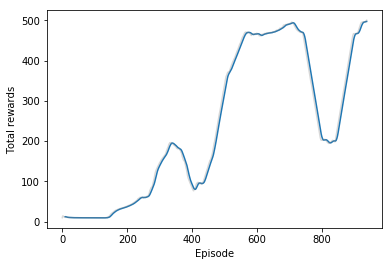

In [23]:
eps, arr = np.array(episode_rewards_list).T
smoothed_arr = running_mean(arr, 10)
plt.plot(eps[-len(smoothed_arr):], smoothed_arr)
plt.plot(eps, arr, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Total rewards')

Text(0, 0.5, 'Total rewards')

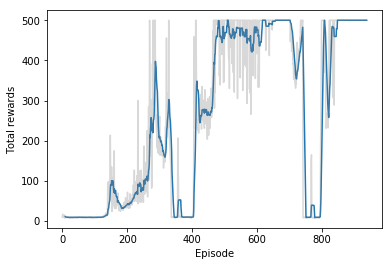

In [24]:
eps, arr = np.array(rewards_list).T
smoothed_arr = running_mean(arr, 10)
plt.plot(eps[-len(smoothed_arr):], smoothed_arr)
plt.plot(eps, arr, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Total rewards')

Text(0, 0.5, 'Average losses')

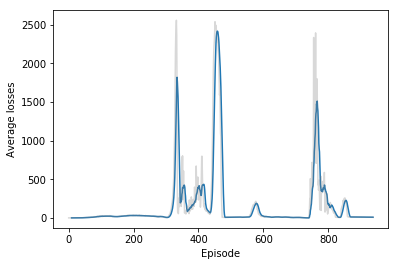

In [25]:
eps, arr = np.array(loss_list).T
smoothed_arr = running_mean(arr, 10)
plt.plot(eps[-len(smoothed_arr):], smoothed_arr)
plt.plot(eps, arr, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Average losses')

## Testing

Let's checkout how our trained agent plays the game.

In [24]:
# Creating a gym env
import gym
env = gym.make('CartPole-v0')
env = gym.make('CartPole-v1')

# A training graph session
with tf.Session(graph=graph) as sess:
    #sess.run(tf.global_variables_initializer())
    #saver.restore(sess, 'checkpoints/model.ckpt')    
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    
    # Episodes/epochs
    for _ in range(10):
        state = env.reset()
        total_reward = 0

        # Steps/batches
        while True:
            env.render()
            action_logits = sess.run(model.actions_logits, feed_dict={model.states: np.reshape(state, [1, -1])})
            action = np.argmax(action_logits)
            state, reward, done, _ = env.step(action)
            total_reward += reward
            if done:
                break
                
        # Closing the env
        print('total_reward: {}'.format(total_reward))
# Close the env at the end
env.close()

INFO:tensorflow:Restoring parameters from checkpoints/model.ckpt
total_reward: 500.0
total_reward: 500.0
total_reward: 500.0
total_reward: 500.0
total_reward: 500.0
total_reward: 500.0
total_reward: 500.0
total_reward: 500.0
total_reward: 500.0
total_reward: 500.0


## Extending this

So, Cart-Pole is a pretty simple game. However, the same model can be used to train an agent to play something much more complicated like Pong or Space Invaders. Instead of a state like we're using here though, you'd want to use convolutional layers to get the state from the screen images.

![Deep Q-Learning Atari](assets/atari-network.png)

I'll leave it as a challenge for you to use deep Q-learning to train an agent to play Atari games. Here's the original paper which will get you started: http://www.davidqiu.com:8888/research/nature14236.pdf.